In [64]:
# https://www.youtube.com/watch?v=QIUxPv5PJOY&list=PLDBrQ1zemiv_xgppk1athh8rX6sAVFHSb&index=8&ab_channel=ComputerScience%28compsci112358%29
import math
import pandas_datareader as web
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
# print(plt.style.available)
plt.style.use('fivethirtyeight')



In [65]:
end_date = datetime.today().strftime('%Y-%m-%d')
ticker = 'SBIN.NS'
df = yf.download(ticker , start ='2000-01-01', end=end_date) 
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS
Date,,,,,,
2000-01-03,15.844796,22.988886,22.988886,22.101974,22.267092,25152894
2000-01-04,16.849522,24.446625,24.720245,22.535995,22.988886,47648560
2000-01-05,16.156946,23.441774,24.974997,23.116261,23.493668,36396207
2000-01-06,16.973082,24.625893,25.286358,23.776726,23.776726,70573968
2000-01-07,17.772964,25.786425,26.409147,24.059780,24.673071,83453217
...,...,...,...,...,...,...
2024-11-25,844.450012,844.450012,849.599976,825.650024,827.000000,23434605
2024-11-26,839.400024,839.400024,846.700012,835.549988,844.000000,8893744


In [66]:
# get no of rows and columns
df.shape

(6216, 6)

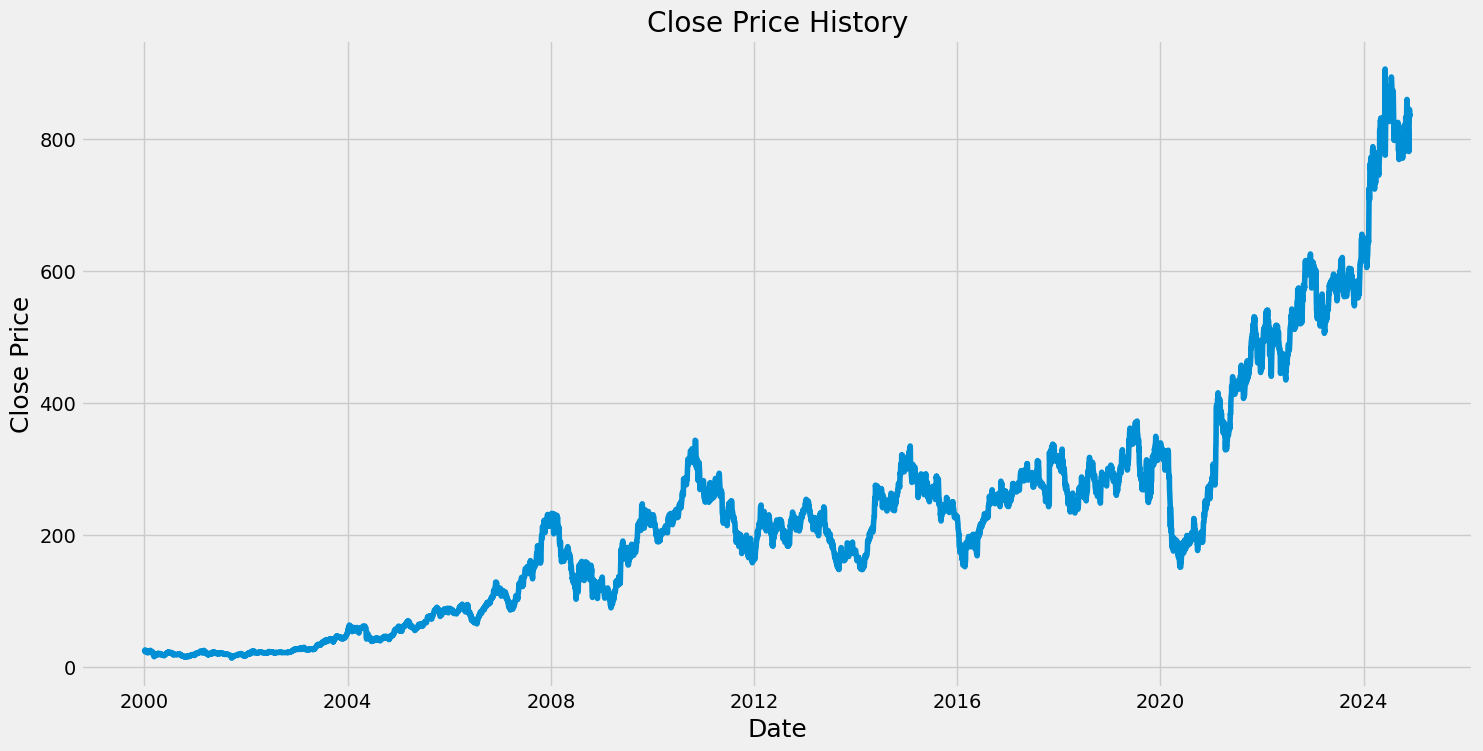

In [67]:
# visualize closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [68]:
df.columns

MultiIndex([('Adj Close', 'SBIN.NS'),
            (    'Close', 'SBIN.NS'),
            (     'High', 'SBIN.NS'),
            (      'Low', 'SBIN.NS'),
            (     'Open', 'SBIN.NS'),
            (   'Volume', 'SBIN.NS')],
           names=['Price', 'Ticker'])

In [69]:
# create a new dataframe with close
data = df.filter(items=[('Close', ticker)])# print(data.head())           # Check the first few rows
print(data.shape)
# convert the dataframe to numpy array
dataset = data.values

# # get number of rows to train the Model 80% of data for training
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

(6216, 1)


4973

In [88]:
# scale the data
import pickle
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved successfully.")

Scaler saved successfully.


In [71]:
# create the training dataset
# create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# split data into x train and y train 
x_train = []
y_train = []

for i in range(60, len(train_data)):
     x_train.append(train_data[i-60:i, 0])
     y_train.append(train_data[i, 0])
     if i<= 60:
          print(x_train)
          print(y_train)
          print()



[array([0.01080661, 0.01244029, 0.01131416, 0.0126412 , 0.0139418 ,
       0.01353999, 0.0112613 , 0.01092293, 0.01089649, 0.01033607,
       0.00998713, 0.01004529, 0.01083834, 0.01017746, 0.01015103,
       0.00918351, 0.00881871, 0.00881871, 0.00937912, 0.01131945,
       0.01091764, 0.01110797, 0.01121371, 0.01240857, 0.01210193,
       0.01120314, 0.01066386, 0.01099166, 0.01135117, 0.01148864,
       0.01323334, 0.01189045, 0.01147806, 0.01147806, 0.01053698,
       0.01086477, 0.01011402, 0.00979151, 0.01077489, 0.0105264 ,
       0.01099694, 0.00923109, 0.01001885, 0.0089403 , 0.00705813,
       0.00747052, 0.00698412, 0.00528699, 0.00395996, 0.00306117,
       0.00242144, 0.00381192, 0.00476358, 0.00615935, 0.00615935,
       0.00615935, 0.00755511, 0.00747052, 0.00623336, 0.00590028])]
[np.float64(0.005461463487786488)]



In [72]:
#  convertx_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)


In [73]:
# reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4913, 60, 1)

In [74]:
# build lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


c:\Users\prakh\OneDrive\Desktop\lstmpricemain\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
# train the model
model.fit(x_train,y_train, batch_size=1,epochs=1)
model.save('pricepred.h5')

4913/4913 ━━━━━━━━━━━━━━━━━━━━ 120s 24ms/step - loss: 6.7860e-04


In [87]:
model.save('pricepred.h5')

In [77]:
# create testing dataset
# create a new array containing scaled values from index 2904 to 3704
test_data = scaled_data[training_data_len - 60: , :]
# create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, (len(test_data))):
    x_test.append(test_data[i-60:i, 0])

In [78]:
# convert the data to a numpy array 
x_test = np.array(x_test)

In [79]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [80]:
# get the models predicted price value 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [81]:
# get the rmse
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse


np.float64(11.653594774290715)

C:\Users\prakh\AppData\Local\Temp\ipykernel_10968\3794093518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


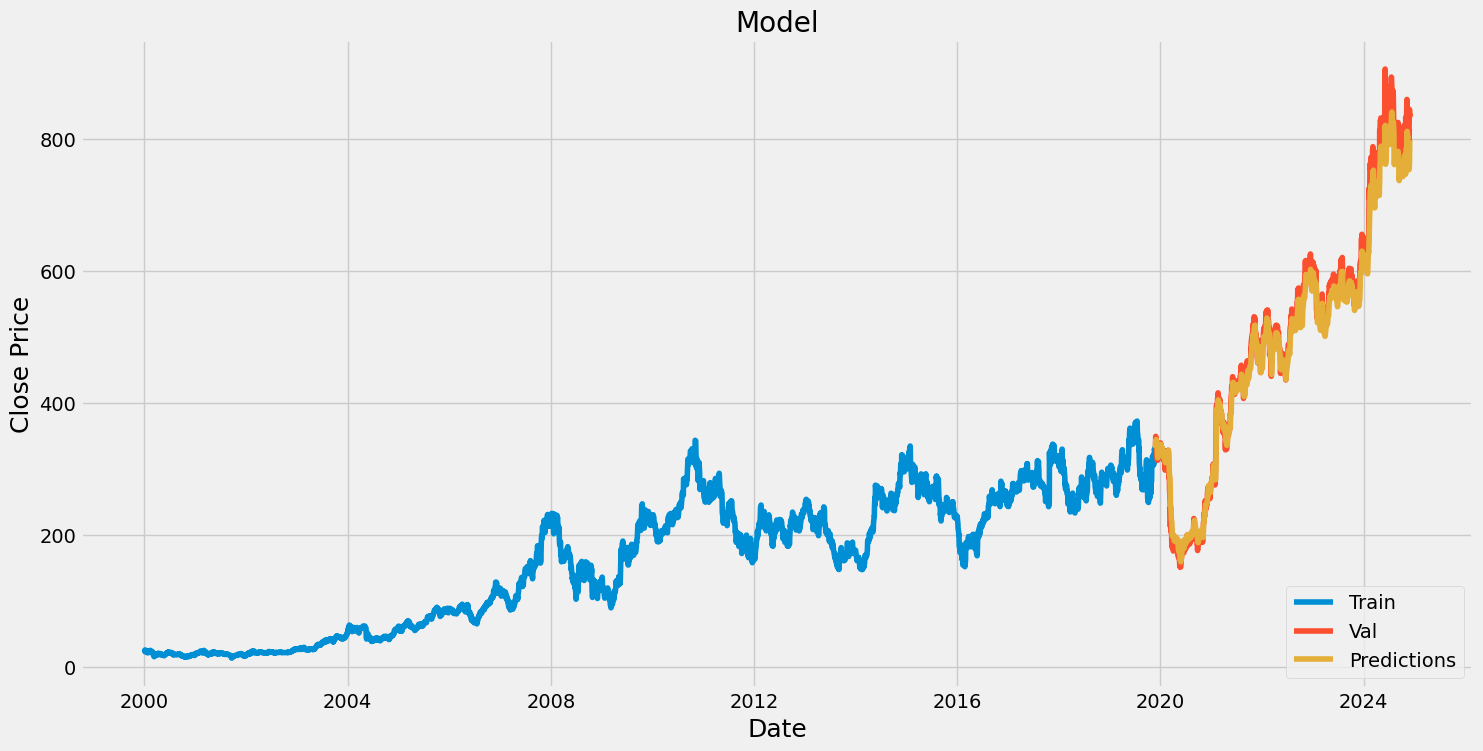

In [82]:
#  plot the data 
train = data[:training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions
# visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize = 18)

plt.plot(train[['Close']])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()
# plt.figure(figsize=(16, 8))
# plt.title('Model')
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Close Price', fontsize=18)

# # Plot train and valid data
# plt.plot(train['Close'], label='Train')  # Label the line as 'Train'
# plt.plot(valid['Close'], label='Val')  # Label the line as 'Val'
# plt.plot(valid['Predictions'], label='Predictions')  # Label the line as 'Predictions'

# # Add legend and display the plot
# plt.legend(loc='lower right')
# plt.show()


In [83]:
#  show the actual price and predicted price 
valid

,Close,Predictions
,SBIN.NS,
Date,,
2019-11-25,336.100006,331.690002
2019-11-26,335.500000,333.737335
2019-11-27,343.549988,335.183319
2019-11-28,349.299988,338.723816
2019-11-29,341.850006,343.551331
...,...,...
2024-11-25,844.450012,762.396301
2024-11-26,839.400024,784.560425


In [84]:
#  get the quote
stock_quote = yf.download(ticker, start ='2010-01-01', end=end_date)
#  create a new data frame 
new_df = stock_quote.filter(items=[('Close', ticker)])
# get last 60 d close price and convert to array
last_60_days = new_df[-60:].values
# scale data to b 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create an empty list 
X_test = []
# append past 60 d
X_test.append(last_60_days_scaled)
# convert the X_test to a numpy array
X_test = np.array(X_test)
# reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# get predicted price
pred_price = model.predict(X_test)
# undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[797.87726]]


In [85]:



# stock_quote2 = yf.download(ticker, start ='2024-11-10', end='2024-12-30')
# print(stock_quote2['Close'])


In [86]:
model.save('lstmpricepred.h5')